In [1]:
import keras
from keras import layers,models
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [2]:
train_data=pd.read_csv('C:\programowanie\python\deep learning\kaggle\s3e6\\train.csv')
#'/kaggle/input/playground-series-season-3-episode-6/train.csv'
test_data=pd.read_csv('C:\programowanie\python\deep learning\kaggle\s3e6\\test.csv')
#'/kaggle/input/playground-series-season-3-episode-6/test.csv'
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22730 entries, 0 to 22729
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 22730 non-null  int64  
 1   squareMeters       22730 non-null  int64  
 2   numberOfRooms      22730 non-null  int64  
 3   hasYard            22730 non-null  int64  
 4   hasPool            22730 non-null  int64  
 5   floors             22730 non-null  int64  
 6   cityCode           22730 non-null  int64  
 7   cityPartRange      22730 non-null  int64  
 8   numPrevOwners      22730 non-null  int64  
 9   made               22730 non-null  int64  
 10  isNewBuilt         22730 non-null  int64  
 11  hasStormProtector  22730 non-null  int64  
 12  basement           22730 non-null  int64  
 13  attic              22730 non-null  int64  
 14  garage             22730 non-null  int64  
 15  hasStorageRoom     22730 non-null  int64  
 16  hasGuestRoom       227

In [3]:
train_data=train_data.set_index('id')
test_data=test_data.set_index('id')
train_data.describe()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
count,2.273000e+04,22730.000000,22730.000000,22730.000000,22730.000000,22730.000000,22730.000000,22730.000000,22730.000000,22730.000000,22730.000000,22730.000000,22730.000000,22730.000000,22730.000000,22730.000000,2.273000e+04
mean,4.658622e+04,48.241091,0.475891,0.452750,47.305983,50013.795996,5.585042,5.620766,2008.005059,0.467972,0.460009,5283.646634,5067.981698,530.469644,0.461681,5.153058,4.634457e+06
std,4.952124e+04,28.226428,0.499429,0.497773,47.777207,30006.637729,2.739533,2.713026,118.826777,0.498984,0.498409,3047.084412,3097.347939,274.840604,0.498540,3.055246,2.925163e+06
min,8.900000e+01,1.000000,0.000000,0.000000,1.000000,3.000000,1.000000,1.000000,1990.000000,0.000000,0.000000,4.000000,1.000000,4.000000,0.000000,0.000000,1.031350e+04
25%,2.039275e+04,25.000000,0.000000,0.000000,25.000000,22936.000000,3.000000,3.000000,2000.000000,0.000000,0.000000,2977.250000,2599.000000,297.000000,0.000000,3.000000,2.041739e+06
50%,4.448400e+04,47.000000,0.000000,0.000000,45.000000,50414.000000,6.000000,6.000000,2006.000000,0.000000,0.000000,5359.000000,4977.000000,515.000000,0.000000,5.000000,4.450823e+06
75%,7.154700e+04,75.000000,1.000000,1.000000,69.000000,76291.000000,8.000000,8.000000,2014.000000,1.000000,1.000000,7746.000000,7652.000000,767.000000,1.000000,8.000000,7.159920e+06
max,6.071330e+06,100.000000,1.000000,1.000000,6000.000000,491100.000000,10.000000,10.000000,10000.000000,1.000000,1.000000,91992.000000,96381.000000,9017.000000,1.000000,10.000000,1.000428e+07


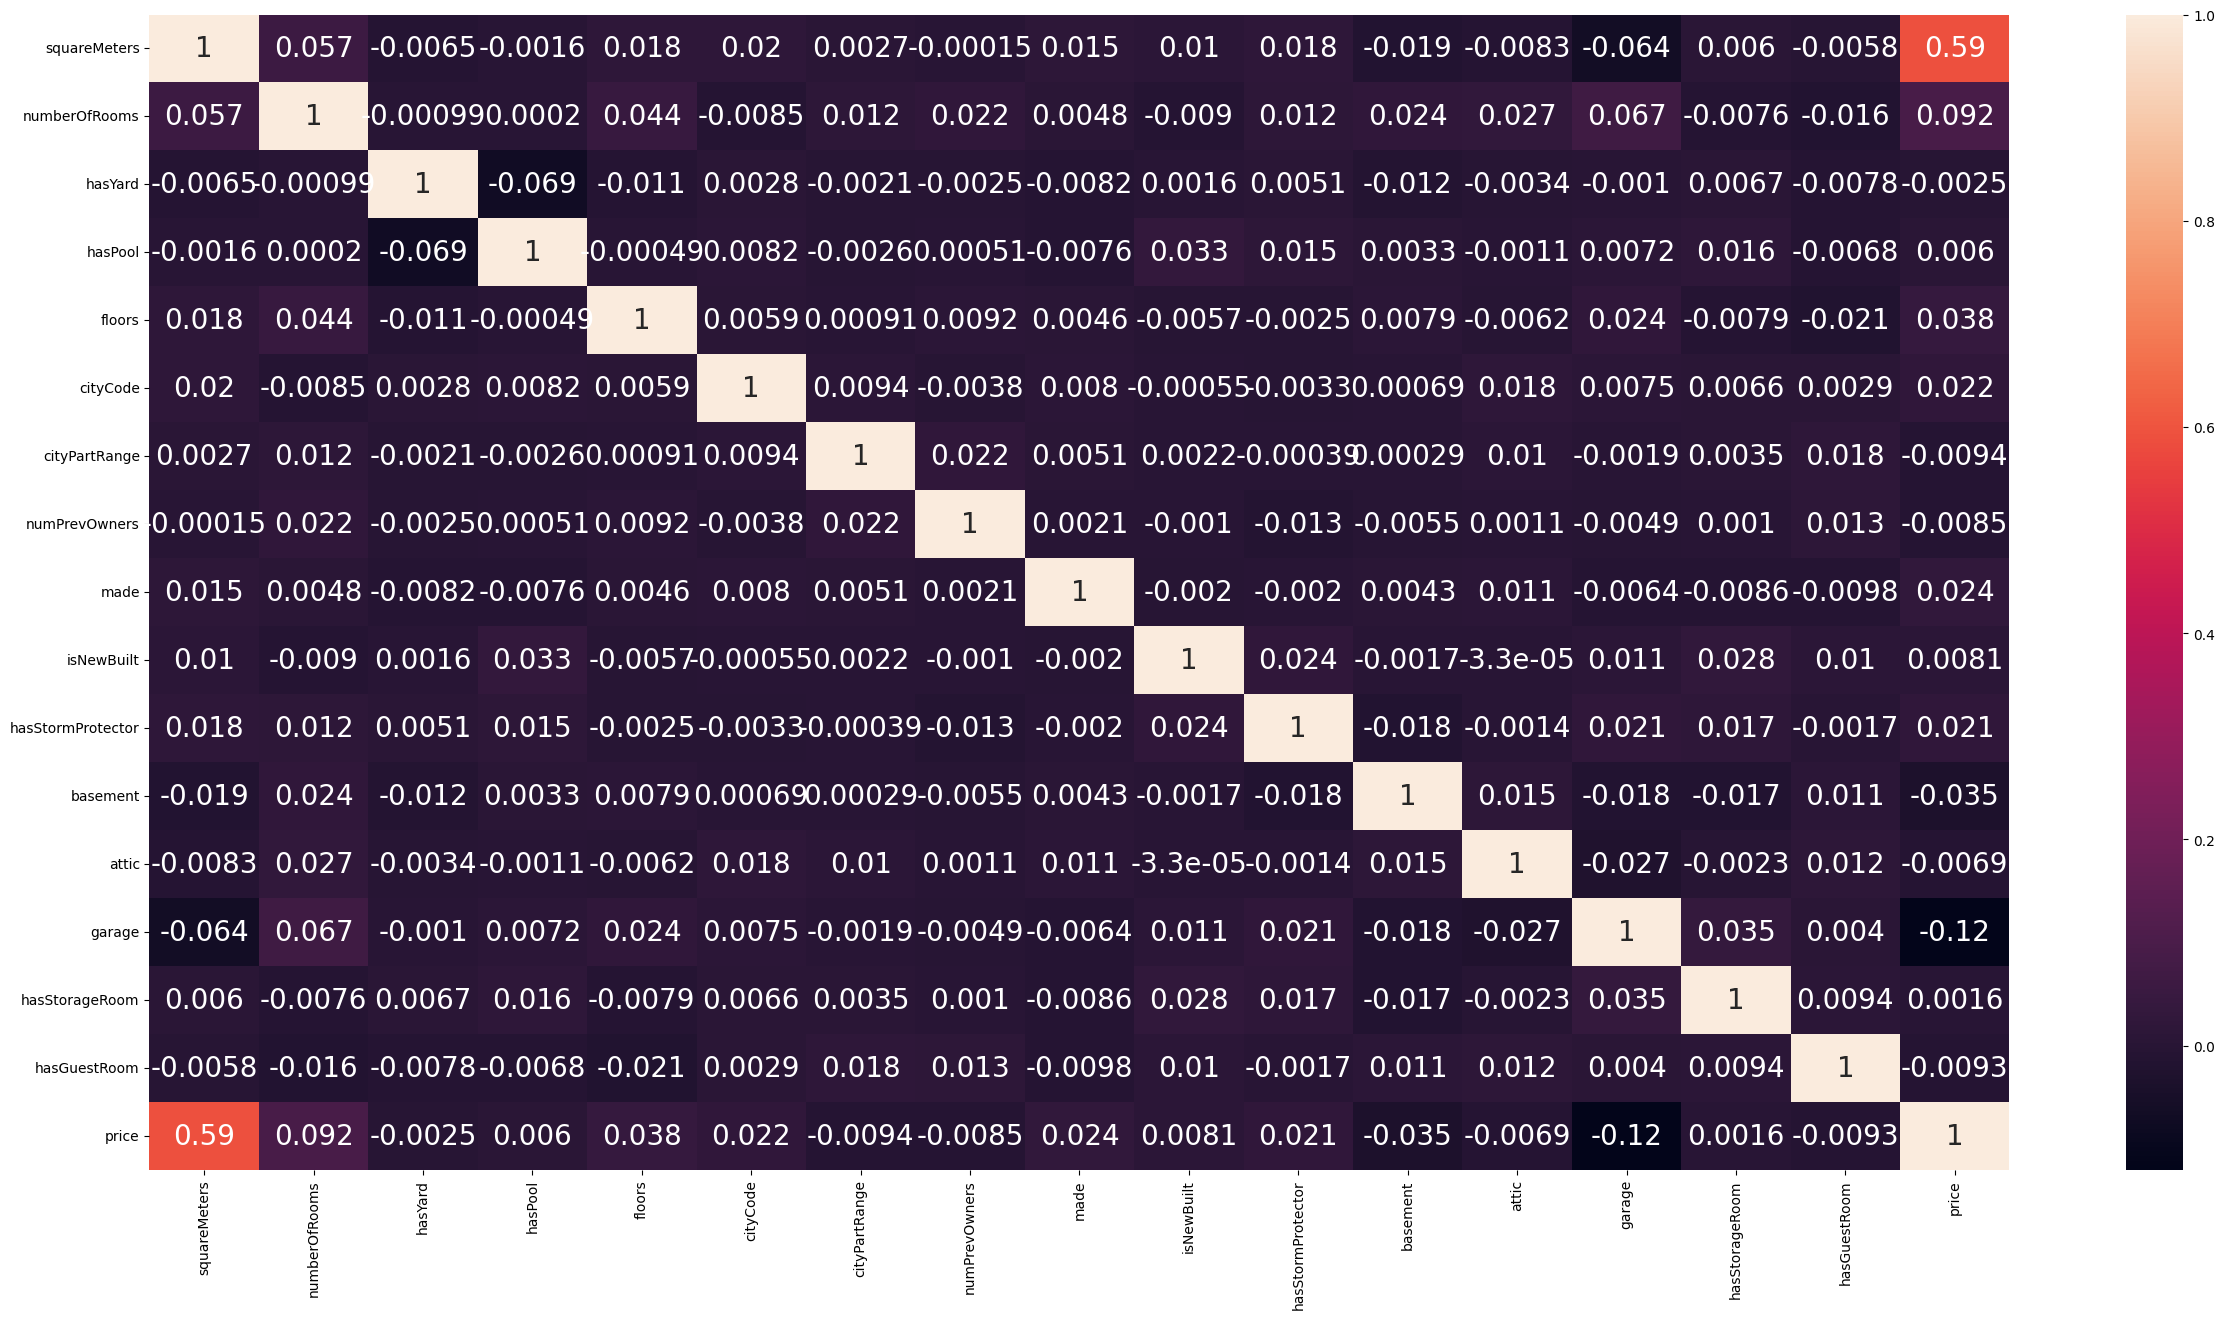

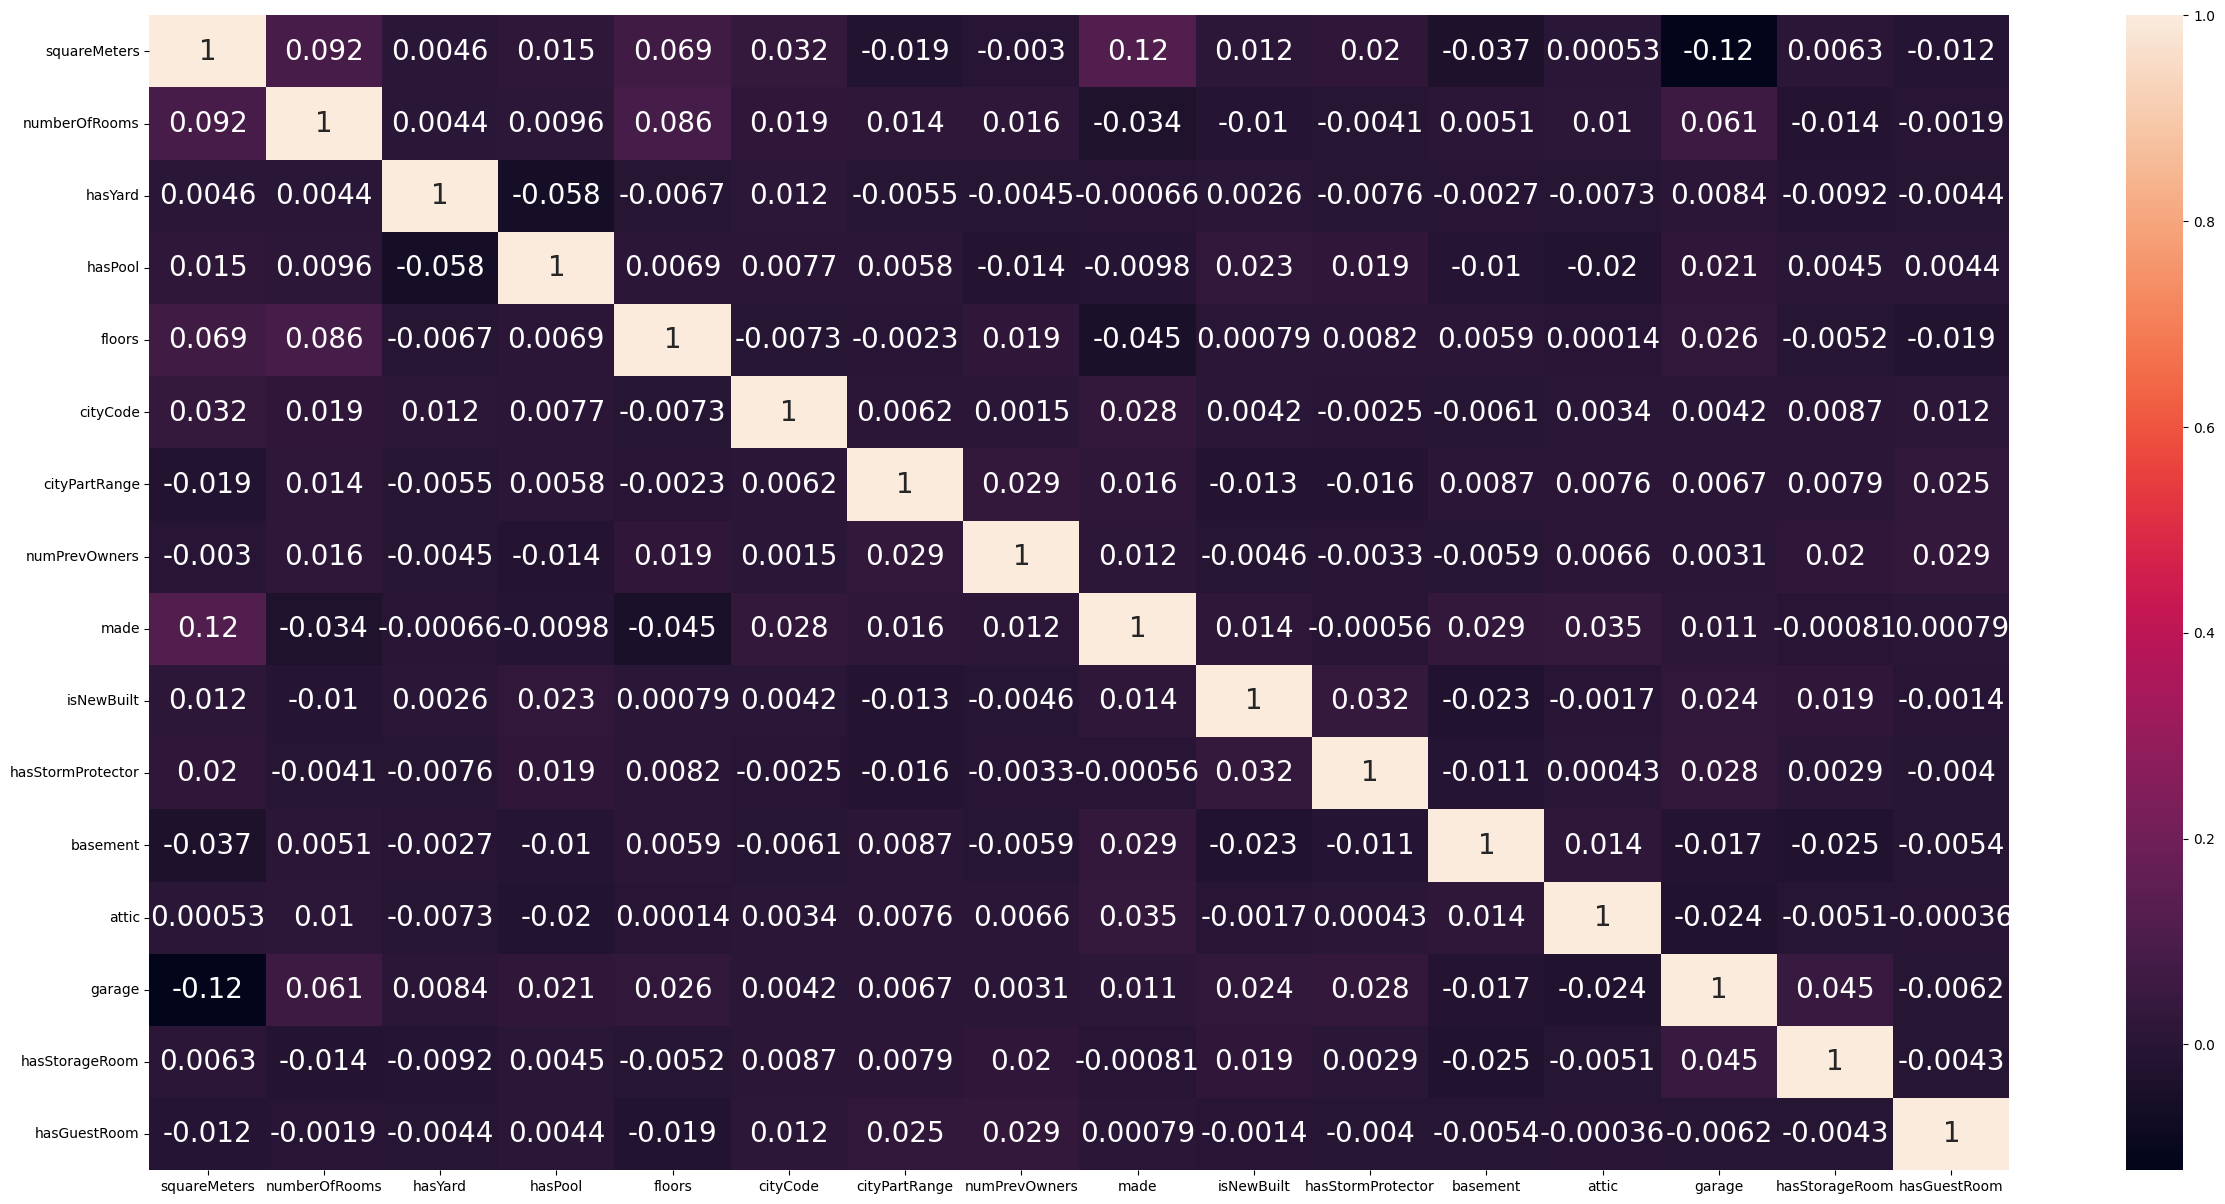

In [4]:
plt.figure(figsize=(30,15))
sb.heatmap(train_data.corr(),annot=True, annot_kws={'size':20})
plt.show()
plt.figure(figsize=(30,15))
sb.heatmap(test_data.corr(),annot=True, annot_kws={'size':20})
plt.show()

In [5]:
sc = RobustScaler()
x_train_data = sc.fit_transform(train_data.drop('price', axis=1))
x_test_data = sc.transform(test_data)

In [6]:
model=models.Sequential()
model.add(layers.Dense(1024,activation='relu',input_shape=(x_train_data.shape[1],)))
model.add(layers.Dense(1024,activation='relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(1,activation='sigmoid'))

In [7]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate = 0.0001),
                loss='mean_squared_error',
                metrics=[keras.metrics.RootMeanSquaredError()])

In [8]:
model.fit(
    x_train_data,
    train_data['price'],
    epochs = 10,
    batch_size = 64)

Epoch 1/10
356/356 [==============================] - 16s 39ms/step - loss: 30034368659456.0000 - root_mean_squared_error: 5480362.0000
Epoch 2/10
356/356 [==============================] - 14s 40ms/step - loss: 30034387533824.0000 - root_mean_squared_error: 5480364.0000
Epoch 3/10
356/356 [==============================] - 15s 42ms/step - loss: 30034381242368.0000 - root_mean_squared_error: 5480363.0000
Epoch 4/10
356/356 [==============================] - 14s 39ms/step - loss: 30034381242368.0000 - root_mean_squared_error: 5480363.0000
Epoch 5/10
356/356 [==============================] - 13s 36ms/step - loss: 30034374950912.0000 - root_mean_squared_error: 5480362.5000
Epoch 6/10
356/356 [==============================] - 13s 37ms/step - loss: 30034395922432.0000 - root_mean_squared_error: 5480364.5000
Epoch 7/10
356/356 [==============================] - 14s 39ms/step - loss: 30034393825280.0000 - root_mean_squared_error: 5480364.5000
Epoch 8/10
356/356 [============================

In [9]:
pred = model.predict(x_test_data)
submission = pd.DataFrame(data={'id':test_data.index, 'price':pred[:,0]})
submission
submission.to_csv('submission.csv', index=False)

474/474 [==============================] - 3s 6ms/step
